In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Descarga el dataset desde la pagina del gobierno
##### http://datos.salud.gob.ar/dataset/covid-19-casos-registrados-en-la-republica-argentina

In [2]:
import wget
from os import remove
from os import path

if path.exists("C:/Users/Francisco/Documents/data_set_arg/tests.csv"):
    remove('C:/Users/Francisco/Documents/data_set_arg/tests.csv')
 
url = "https://sisa.msal.gov.ar/datos/descargas/covid-19/files/Covid19Determinaciones.csv"
wget.download(url, 'C:/Users/Francisco/Documents/data_set_arg/tests.csv')

'C:/Users/Francisco/Documents/data_set_arg/tests.csv'

# Casos

In [3]:
df_casos = pd.read_csv('data_set_arg/tests.csv').drop(['codigo_indec_provincia', 'codigo_indec_departamento', 
                                           'departamento', 'localidad', 'codigo_indec_localidad',
                                            'origen_financiamiento', 'tipo', 'ultima_actualizacion']
                                           , axis=1)

In [4]:
df_casos.head()

,fecha,provincia,total,positivos
0,2008-08-13,Jujuy,1,NaN
1,2012-09-21,Córdoba,1,1.0
2,2019-07-13,CABA,1,NaN
3,2019-09-30,Córdoba,1,1.0
4,2019-10-03,Mendoza,1,1.0


In [5]:
hoy = pd.to_datetime("today")

df_casos['fecha'] = pd.to_datetime(df_casos['fecha'], errors='coerce')

df_casos = df_casos[(hoy - df_casos['fecha']).dt.days <= 16].fillna(0)

df_casos

,fecha,provincia,total,positivos
79077,2021-04-01,CABA,232,57.0
79078,2021-04-01,Buenos Aires,49,0.0
79079,2021-04-01,Santa Cruz,424,6.0
79080,2021-04-01,Buenos Aires,315,190.0
79081,2021-04-01,CABA,453,114.0
...,...,...,...,...
83810,2021-04-16,CABA,2,0.0
83811,2021-04-16,Buenos Aires,61,45.0
83812,2021-04-16,Buenos Aires,11,3.0
83813,2021-04-16,Buenos Aires,2,1.0


In [6]:
df_casos['fecha'].max()

Timestamp('2021-04-16 00:00:00')

In [7]:
df_casos = df_casos.groupby(['fecha'])['positivos', 'total'].sum().reset_index()
df_casos

,fecha,positivos,total
0,2021-04-01,9077.0,40813
1,2021-04-02,7701.0,31167
2,2021-04-03,8315.0,34153
3,2021-04-04,6183.0,31551
4,2021-04-05,12454.0,51519
5,2021-04-06,14860.0,60191
6,2021-04-07,14946.0,62499
7,2021-04-08,14028.0,49408
8,2021-04-09,14186.0,48562
9,2021-04-10,10777.0,39600


In [8]:
colors = ['red', 'tan', 'lime','blue','yellow','tomato', 'cyan','green', 'peru', 'slategray', 'indigo', 'coral']
def get_color(n):
    return colors[n-1]

In [9]:
df_casos['dia'] = [x.day_name(locale='Spanish') + ' {}'.format(x.day) for x in df_casos['fecha']]
df_casos['mes'] = df_casos['fecha'].dt.month
df_casos['mes_name'] = df_casos['fecha'].dt.month_name(locale = 'Spanish')
df_casos['%positividad'] = (df_casos.positivos * 100) / df_casos.total
df_casos['color'] = df_casos['mes'].transform(get_color)


freq = 1000000 / 45000000 
df_casos['total'] = df_casos['total'] * freq


df_casos = df_casos.sort_values(by=['fecha'], ascending = True).reset_index()\
[['fecha','mes_name', 'mes', 'dia','total','%positividad', 'color']]
df_casos

,fecha,mes_name,mes,dia,total,%positividad,color
0,2021-04-01,Abril,4,Jueves 1,906.955556,22.240463,blue
1,2021-04-02,Abril,4,Viernes 2,692.600000,24.708827,blue
2,2021-04-03,Abril,4,Sábado 3,758.955556,24.346324,blue
3,2021-04-04,Abril,4,Domingo 4,701.133333,19.596843,blue
4,2021-04-05,Abril,4,Lunes 5,1144.866667,24.173606,blue
5,2021-04-06,Abril,4,Martes 6,1337.577778,24.688076,blue
6,2021-04-07,Abril,4,Miércoles 7,1388.866667,23.913983,blue
7,2021-04-08,Abril,4,Jueves 8,1097.955556,28.392163,blue
8,2021-04-09,Abril,4,Viernes 9,1079.155556,29.212141,blue
9,2021-04-10,Abril,4,Sábado 10,880.000000,27.214646,blue


## Graficos

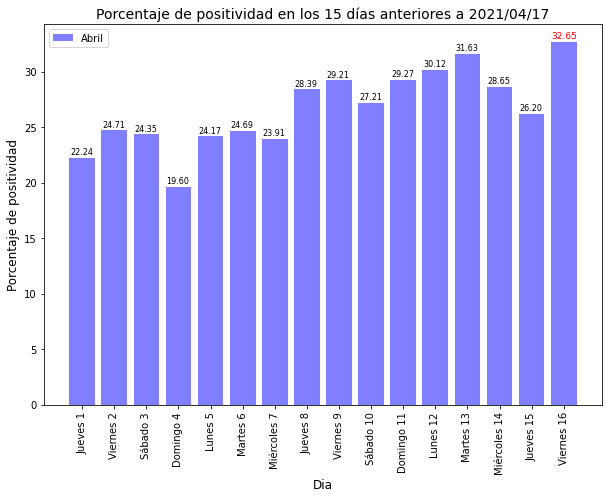

In [10]:
fig = plt.figure(figsize=(10,7))
barWidth = 0.9

for m in df_casos['mes_name'].unique():
    df = df_casos[df_casos['mes_name'] == m]
    plt.bar(x=df['dia'],  height=df['%positividad'], color=df['color'], alpha=0.5, label=m)

label = df_casos['%positividad']
maxim = label.max()
 
for i in range(len(df_casos['dia'])):
    c = 'black'
    s = 8
    if label[i] == maxim:
        c = 'red'
        s = 9
    plt.text(x = i-0.38 , y = label[i]+0.3, s = '{:.2f}'.format(label[i]), size = s, color=c)    
    
plt.legend()
plt.xticks(df_casos['dia'], rotation=90)
plt.xlabel('Dia', size = 12)
plt.ylabel('Porcentaje de positividad', size = 12)
plt.title('Porcentaje de positividad en los 15 días anteriores a ' + hoy.strftime("%Y/%m/%d"), size = 14)


plt.show()

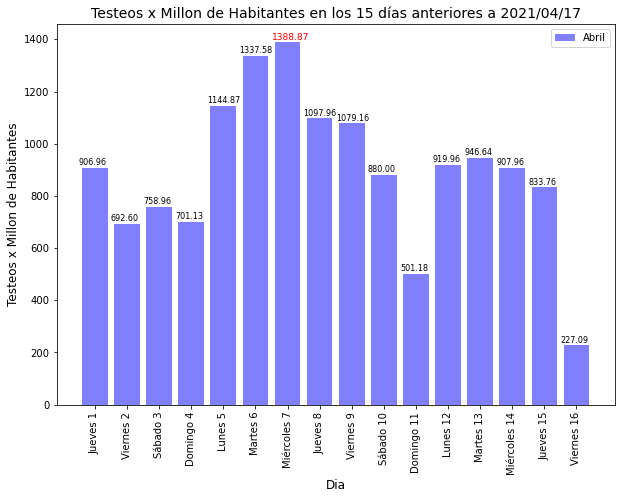

In [11]:
fig = plt.figure(figsize=(10,7))
barWidth = 0.9

for m in df_casos['mes_name'].unique():
    df = df_casos[df_casos['mes_name'] == m]
    plt.bar(x=df['dia'],  height=df['total'], color=df['color'], alpha=0.5, label=m)

label = df_casos['total']
maxim = label.max()
 
for i in range(len(df_casos['dia'])):
    c = 'black'
    s = 8
    if label[i] == maxim:
        c = 'red'
        s = 9
    plt.text(x = i-0.5 , y = label[i]+10, s = '{:.2f}'.format(label[i]), size = s, color=c)    
    
plt.legend()
plt.xticks(df_casos['dia'], rotation=90)
plt.xlabel('Dia', size = 12)
plt.ylabel('Testeos x Millon de Habitantes', size = 12)
plt.title('Testeos x Millon de Habitantes en los 15 días anteriores a ' + hoy.strftime("%Y/%m/%d"), size = 14)


plt.show()